# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Is it really wrong to say Bitcoiners ‘do not care’ about Bitcoin’s price drop.  Bitcoin&#8217;s price crash has set many investors panicking as they perhaps question their investment strategies and the health of their portfolios. For his part, investment analyst Anthony Pompliano claimed that though Bitcoin&#8217;s price performance might look worrying, Bitcoin miners and Bitcoiners &#8220;do not care.&#8221; However, this is quite a reductive analysis, as the situation is [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/is-it-really-wrong-to-say-bitcoiners-do-not-care-about-bitcoins-price-drop/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Clashes at Belgium Covid protest.  A rally sees violent exchanges in Brussels as tens of thousands marched against Covid restrictions. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-europe-60106108) 

### Kainų kaita pandemijos metu

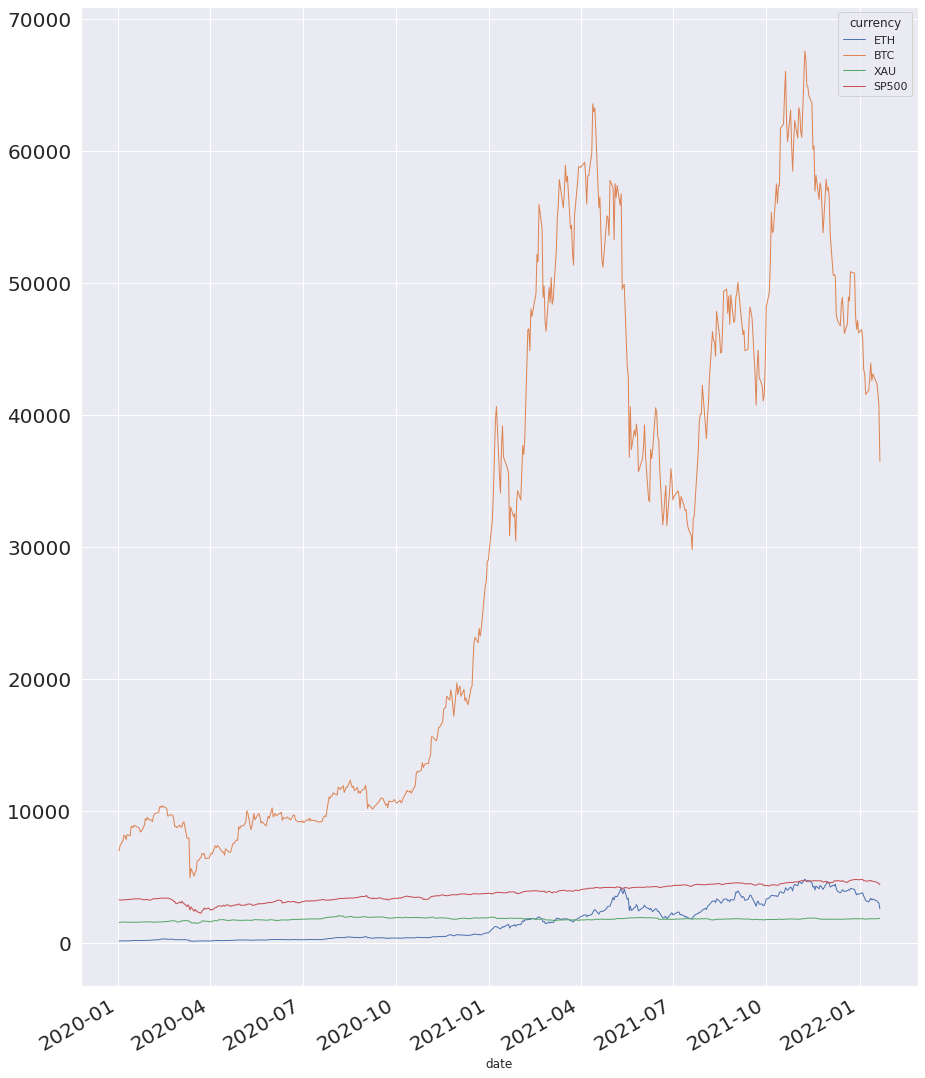

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903237,0.154638,0.917837
BTC,0.903237,1.000000,0.136795,0.874156
XAU,0.154638,0.136795,1.000000,0.300781
SP500,0.917837,0.874156,0.300781,1.000000


In [8]:
#hide ### Koreliacijos matrica.

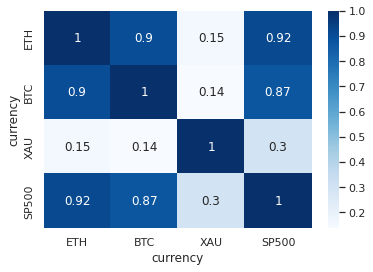

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')